In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

SVOLGO DELLE ANALISI PRELIMINARI

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#converto le features in un dataframe
df = pd.DataFrame(X, columns=breast_cancer_wisconsin_diagnostic.data.headers.drop('ID'))

#aggiungo la colonna target
df['Diagnosis']=y

#controllo le prime righe
df.head()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [3]:
# Esplorazione dei dati
print("Dimensioni del dataset:", df.shape)
print("\nInformazioni sul dataset:")
print(df.info())
print("\nStatistiche descrittive del dataset:")
print(df.describe())

Dimensioni del dataset: (569, 31)

Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 

In [4]:
# Controllo dei valori mancanti
print("\nValori mancanti per variabile:")
print(df.isnull().sum())
#non ci sono valori mancanti


Valori mancanti per variabile:
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64


In [5]:
# Distribuzione delle classi nel target
print("\nDistribuzione delle classi nel target:")
print(df['Diagnosis'].value_counts())
perc=df['Diagnosis'].value_counts()/df['Diagnosis'].count()
print("\nValori percentuali:")
print(perc)

#le classi sembrano essere abbastanza bilanciate


Distribuzione delle classi nel target:
B    357
M    212
Name: Diagnosis, dtype: int64

Valori percentuali:
B    0.627417
M    0.372583
Name: Diagnosis, dtype: float64


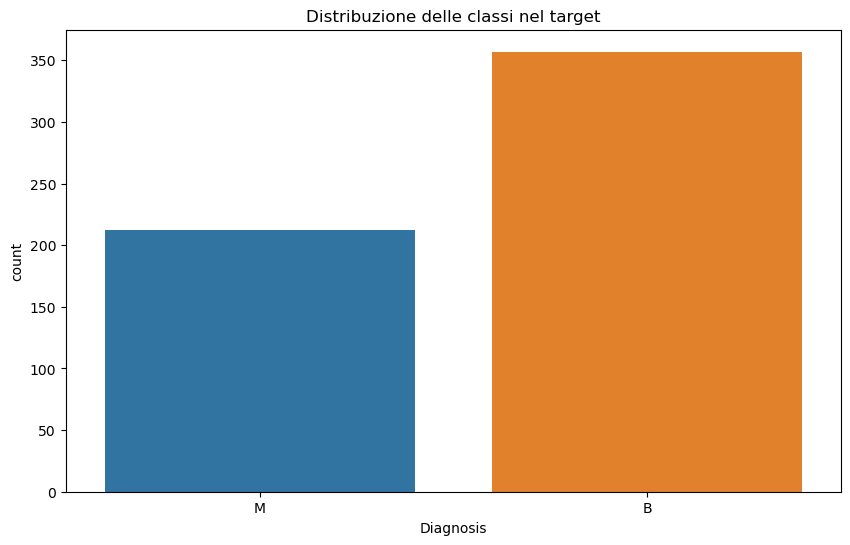

In [6]:
#rappresentazione grafica delle due classi

plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribuzione delle classi nel target')
plt.show()

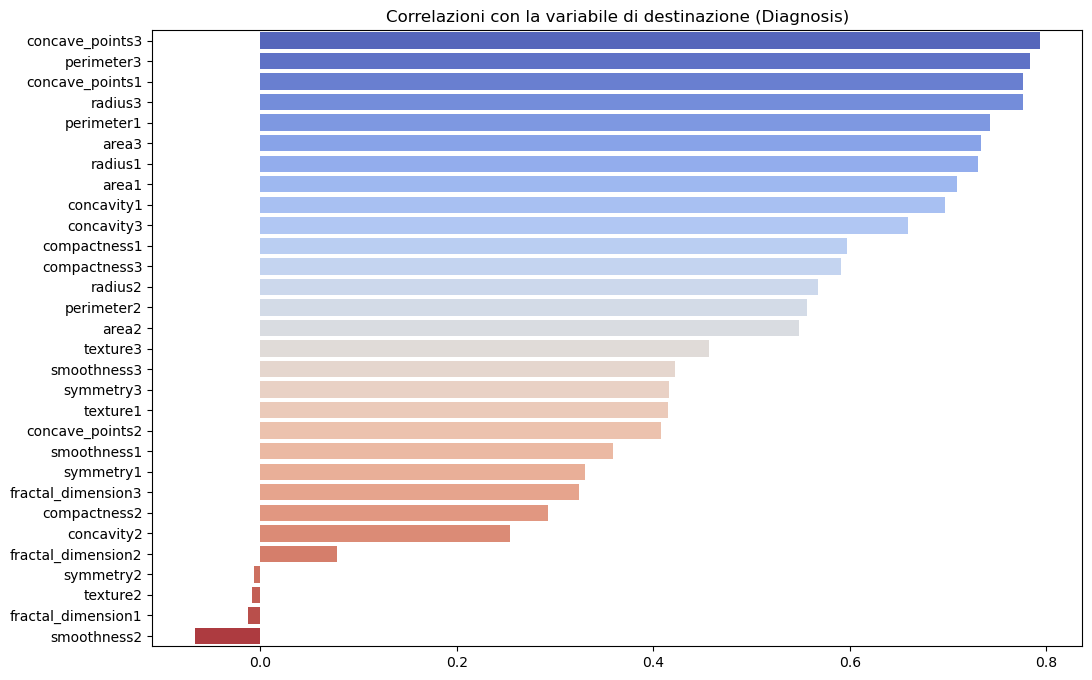

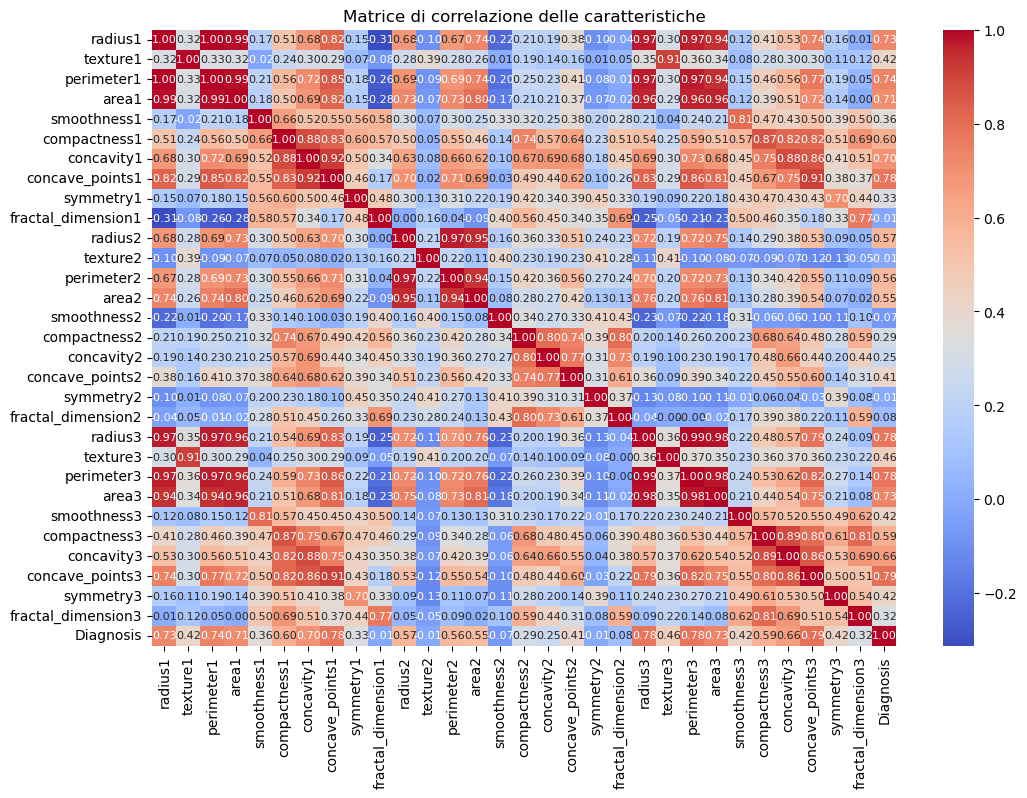

In [7]:
#per calcolare la correlazione tra le variabili, codifico il target
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])

#calcolo delle correlazioni con la variabile di destinazione
plt.figure(figsize=(12, 8))
target_corr = df.corr()['Diagnosis'].sort_values(ascending=False)
sns.barplot(x=target_corr.drop('Diagnosis').values, y=target_corr.drop('Diagnosis').index, palette='coolwarm')
plt.title('Correlazioni con la variabile di destinazione (Diagnosis)')
plt.show()


#vedo se ci sono variabili correlate
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})
plt.title('Matrice di correlazione delle caratteristiche')
plt.show()

In [9]:
#PREPROCESSING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=42)

preprocessor = StandardScaler()

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [11]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a pipeline that includes preprocessing and the classifier
clf = Pipeline(
    steps=[('preprocessor',
            preprocessor), ('classifier', LogisticRegression(max_iter=1000))])

# Train the model
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
# Calcola la precisione per la classe 'M'
precision_m = precision_score(y_test, y_pred, pos_label='M')
print('Precision for class M:', precision_m)
# Calcola recall per la classe 'M'
recall_m = recall_score(y_test, y_pred, pos_label='M')
print('Recall for class M:', recall_m)
# Calcola F1 score per la classe 'M'
f1_m = f1_score(y_test, y_pred, pos_label='M')
print('F1 Score for class M:', f1_m) 


Accuracy: 0.9824561403508771
Precision for class M: 1.0
Recall for class M: 0.9411764705882353
F1 Score for class M: 0.9696969696969697


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
#SVM

from sklearn.svm import SVC

# Create a pipeline with the preprocessor and an SVM classifier
# Note: SVM can be computationally expensive, so we might start with a linear kernel for speed
clf = Pipeline(
    steps=[('preprocessor',
            preprocessor), ('classifier',
                            SVC(kernel='linear', random_state=42))])

# Train the SVM model
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
# Calcola la precisione per la classe 'M'
precision_m = precision_score(y_test, y_pred, pos_label='M')
print('Precision for class M:', precision_m)
# Calcola recall per la classe 'M'
recall_m = recall_score(y_test, y_pred, pos_label='M')
print('Recall for class M:', recall_m)
# Calcola F1 score per la classe 'M'
f1_m = f1_score(y_test, y_pred, pos_label='M')
print('F1 Score for class M:', f1_m) 

Accuracy: 0.9649122807017544
Precision for class M: 0.9411764705882353
Recall for class M: 0.9411764705882353
F1 Score for class M: 0.9411764705882353


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
#K-NN

from sklearn.neighbors import KNeighborsClassifier


# Define the pipeline with the preprocessor, optional dense transformer, and KNN classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                     
                      ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Train the KNN model
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
# Calcola la precisione per la classe 'M'
precision_m = precision_score(y_test, y_pred, pos_label='M')
print('Precision for class M:', precision_m)
# Calcola recall per la classe 'M'
recall_m = recall_score(y_test, y_pred, pos_label='M')
print('Recall for class M:', recall_m)
# Calcola F1 score per la classe 'M'
f1_m = f1_score(y_test, y_pred, pos_label='M')
print('F1 Score for class M:', f1_m) 

Accuracy: 0.9298245614035088
Precision for class M: 0.8823529411764706
Recall for class M: 0.8823529411764706
F1 Score for class M: 0.8823529411764706


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


il miglior modello sembra essere la regressione logistica

In [57]:
#black box model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Preprocess the data#
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_label = label_encoder.fit_transform(df['Diagnosis'])

# Split the data into training and test sets
X_train, X_test, y_trainl, y_testl = train_test_split(X_scaled,
                                                    y_label,
                                                    test_size=0.1,
                                                    random_state=42)
# Define the model architecture
model = Sequential([
    Dense(30, activation='relu', input_shape=(X_train.shape[1], )),
    Dense(65, activation="relu"),
    Dense(65,activation="relu"),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_trainl, epochs=100, batch_size=3, verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_testl, verbose=0)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')


C:\Users\Utente\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Utente\AppData\Roaming\Python\Python311\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


Test loss: 0.000, Test accuracy: 0.702


In [74]:
from xgboost import XGBClassifier


clf = XGBClassifier()

# Train the XGBoost model
clf.fit(X_train, y_trainl)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_testl, y_pred))
# Calcola la precisione per la classe 'M'
precision_m = precision_score(y_testl, y_pred, pos_label=1)
print('Precision for class M:', precision_m)
# Calcola recall per la classe 'M'
recall_m = recall_score(y_testl, y_pred, pos_label=1)
print('Recall for class M:', recall_m)
# Calcola F1 score per la classe 'M'
f1_m = f1_score(y_testl, y_pred, pos_label=1)
print('F1 Score for class M:', f1_m) 


Accuracy: 0.9649122807017544
Precision for class M: 0.9411764705882353
Recall for class M: 0.9411764705882353
F1 Score for class M: 0.9411764705882353


In [16]:
from sklearn.ensemble import RandomForestClassifier
# Definisci il classificatore Random Forest
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
# Calcola la precisione per la classe 'M'
precision_m = precision_score(y_test, y_pred, pos_label="M")
print('Precision for class M:', precision_m)
# Calcola recall per la classe 'M'
recall_m = recall_score(y_test, y_pred, pos_label="M")
print('Recall for class M:', recall_m)
# Calcola F1 score per la classe 'M'
f1_m = f1_score(y_test, y_pred, pos_label="M")
print('F1 Score for class M:', f1_m) 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9649122807017544
Precision for class M: 0.9411764705882353
Recall for class M: 0.9411764705882353
F1 Score for class M: 0.9411764705882353
